In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
!pip install utm
import utm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6108 sha256=25afece18b03c24740a041a8a0d3013f888ac57ba5e9af872e21eb59bb8fc935
  Stored in directory: /root/.cache/pip/wheels/a5/b0/12/7ee4fdb0f9fbb4157100bd02390436ed5d58ebfd3c6d6a0886
Successfully built utm


In [2]:
#Inertial Measurement Unit
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir('gdrive/My Drive/Colab Notebooks/oxts/oxts/data/')

# New Section

In [4]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/oxts/oxts/data'

In [5]:
latitude = []
longitude = []
altitude = []
yaw = []
forward_velocity = []
yaw_velocity = []
gt_trajectory_lla = []

for i in range(154):
  gps_imu_path = '/content/gdrive/My Drive/Colab Notebooks/oxts/oxts/data/'+str(i).zfill(10)+'.txt'
  data = open(gps_imu_path)
  data = data.read().split(" ")
  lat = float(data[0])
  lon = float(data[1])
  alt = float(data[2])
  yaw_angle = float(data[5])
  fwd_vel = float(data[8])
  yaw_rate = float(data[19])
  latitude.append(lat)
  longitude.append(lon)
  altitude.append(alt)
  yaw.append(yaw_angle)
  forward_velocity.append(fwd_vel)
  yaw_velocity.append(yaw_rate)
  gt_trajectory_lla.append([lon, lat, alt])


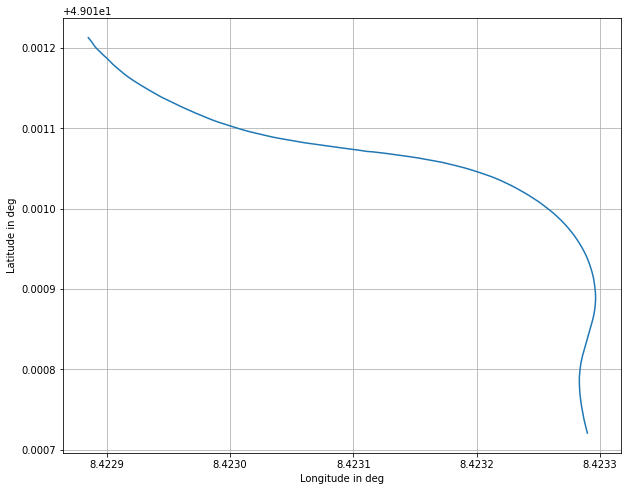

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(longitude,latitude)
ax.set_xlabel('Longitude in deg')
ax.set_ylabel('Latitude in deg')
ax.grid()

In [7]:
# Convert lat-lon to X-Y format
# Easting Northing
length = len(latitude)
easting = np.ndarray([length],dtype = np.float32)
northing = np.ndarray([length],dtype = np.float32)
x = np.ndarray([length],dtype = np.float32)
y = np.ndarray([length],dtype = np.float32)

for i in range(length):
  easting[i],northing[i],_,_ = utm.from_latlon(latitude[i],longitude[i])

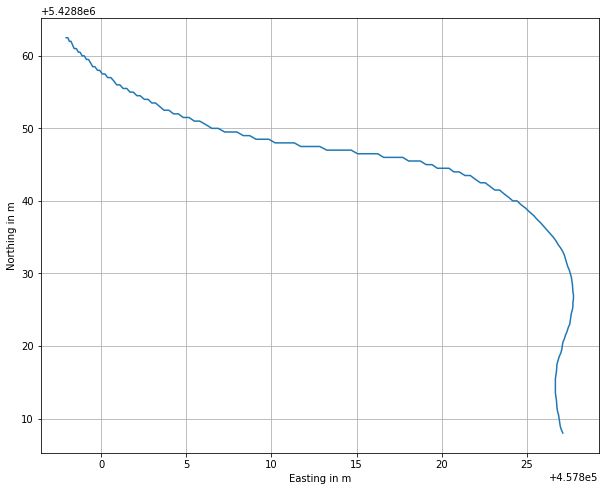

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(easting,northing)
ax.set_xlabel('Easting in m')
ax.set_ylabel('Northing in m')
ax.grid()

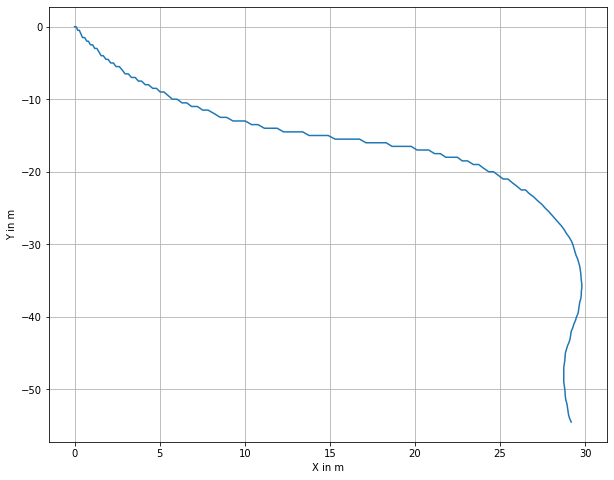

In [9]:
for i in range(length):
  x[i] = easting[i]-easting[0]
  y[i] = northing[i]-northing[0]
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(x,y)
ax.set_xlabel('X in m')
ax.set_ylabel('Y in m')
ax.grid()

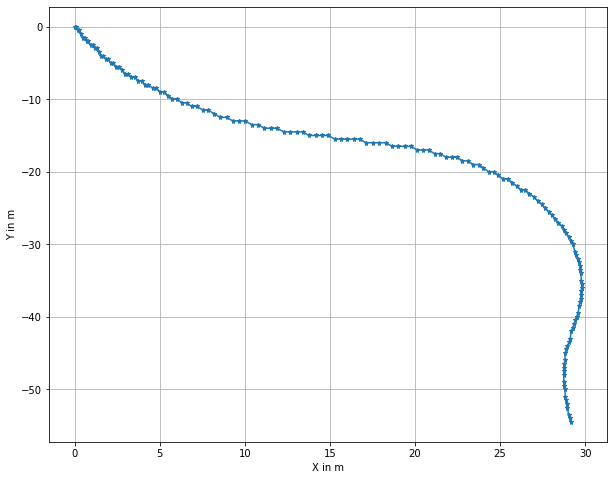

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(x,y, marker='*',markersize=5)
ax.set_xlabel('X in m')
ax.set_ylabel('Y in m')
ax.grid()

In [11]:
timestamp_path = '/content/gdrive/My Drive/Colab Notebooks/oxts/oxts/timestamps.txt'
timestamps = []
with open(timestamp_path,'r') as f:
  for line in f.readlines():
    t = datetime.datetime.strptime(line[:-4],'%Y-%m-%d %H:%M:%S.%f')
    timestamps.append(t)

In [12]:
print(timestamps)

[datetime.datetime(2011, 9, 26, 13, 4, 32, 349659), datetime.datetime(2011, 9, 26, 13, 4, 32, 459792), datetime.datetime(2011, 9, 26, 13, 4, 32, 559701), datetime.datetime(2011, 9, 26, 13, 4, 32, 659871), datetime.datetime(2011, 9, 26, 13, 4, 32, 769712), datetime.datetime(2011, 9, 26, 13, 4, 32, 869694), datetime.datetime(2011, 9, 26, 13, 4, 32, 969668), datetime.datetime(2011, 9, 26, 13, 4, 33, 79680), datetime.datetime(2011, 9, 26, 13, 4, 33, 179855), datetime.datetime(2011, 9, 26, 13, 4, 33, 279744), datetime.datetime(2011, 9, 26, 13, 4, 33, 389726), datetime.datetime(2011, 9, 26, 13, 4, 33, 489716), datetime.datetime(2011, 9, 26, 13, 4, 33, 589716), datetime.datetime(2011, 9, 26, 13, 4, 33, 699840), datetime.datetime(2011, 9, 26, 13, 4, 33, 799710), datetime.datetime(2011, 9, 26, 13, 4, 33, 899739), datetime.datetime(2011, 9, 26, 13, 4, 34, 9723), datetime.datetime(2011, 9, 26, 13, 4, 34, 109763), datetime.datetime(2011, 9, 26, 13, 4, 34, 209842), datetime.datetime(2011, 9, 26, 13

In [14]:
elasped_time = np.array(timestamps)-timestamps[0]
print(elasped_time)
print(elasped_time[153].total_seconds())
print(elasped_time[153])
ts = [t.total_seconds() for t in elasped_time]
print(ts[:10])
#sampling time dt1 = 0.110133
# Prepare the state transition noise covaraince

[datetime.timedelta(0) datetime.timedelta(microseconds=110133)
 datetime.timedelta(microseconds=210042)
 datetime.timedelta(microseconds=310212)
 datetime.timedelta(microseconds=420053)
 datetime.timedelta(microseconds=520035)
 datetime.timedelta(microseconds=620009)
 datetime.timedelta(microseconds=730021)
 datetime.timedelta(microseconds=830196)
 datetime.timedelta(microseconds=930085)
 datetime.timedelta(seconds=1, microseconds=40067)
 datetime.timedelta(seconds=1, microseconds=140057)
 datetime.timedelta(seconds=1, microseconds=240057)
 datetime.timedelta(seconds=1, microseconds=350181)
 datetime.timedelta(seconds=1, microseconds=450051)
 datetime.timedelta(seconds=1, microseconds=550080)
 datetime.timedelta(seconds=1, microseconds=660064)
 datetime.timedelta(seconds=1, microseconds=760104)
 datetime.timedelta(seconds=1, microseconds=860183)
 datetime.timedelta(seconds=1, microseconds=960104)
 datetime.timedelta(seconds=2, microseconds=70074)
 datetime.timedelta(seconds=2, microsec

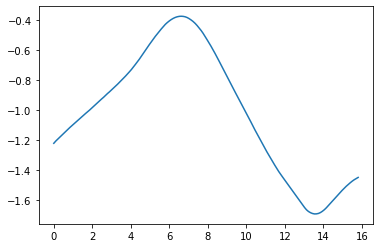

In [15]:
plt.plot(ts,yaw)

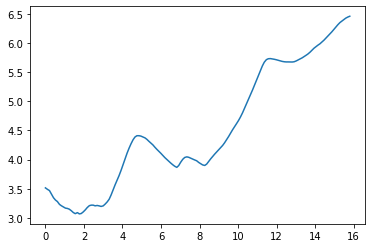

In [16]:
plt.plot(ts,forward_velocity)

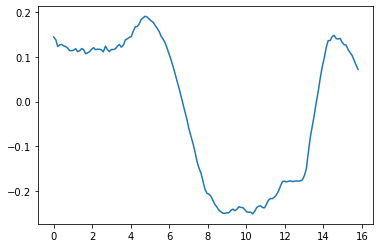

In [17]:
plt.plot(ts,yaw_velocity)

In [18]:
gt_trajectory_lla = np.array(gt_trajectory_lla)
gt_trajectory_lla.shape

(154, 3)

In [19]:
gt_trajectory_xyz = np.array([x,y])
gt_trajectory_xyz.shape

obs_trajectory_xyz = gt_trajectory_xyz
obs_yaw_rates = np.array(yaw_velocity)
obs_forward_velocities = np.array(forward_velocity)

In [20]:
#WITH NOISY GPS VALUES
N = len(ts)
xy_obs_noise_std = 0.3  # standard deviation of observation noise of x and y in meter
xy_obs_noise = np.random.normal(0.0, xy_obs_noise_std, (2, N))  # gen gaussian noise
obs_trajectory_xyz = gt_trajectory_xyz.copy()
obs_trajectory_xyz[:2, :] += xy_obs_noise  # add the noise to ground-truth positions

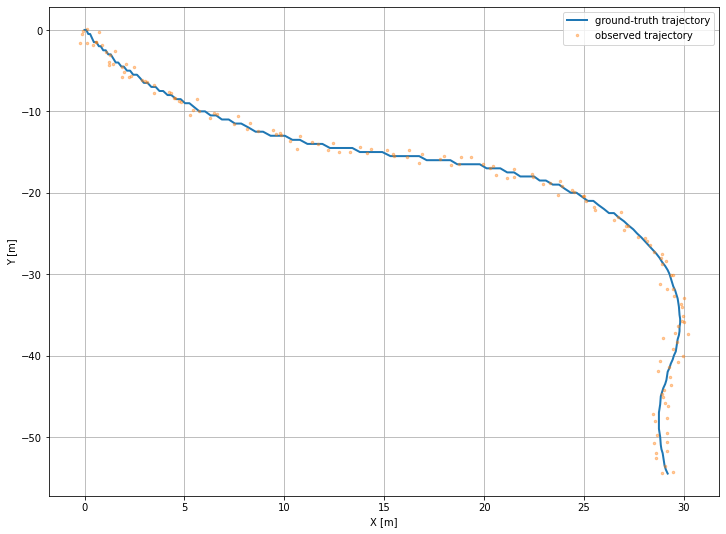

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
xs, ys = gt_trajectory_xyz
ax.plot(xs, ys, lw=2, label='ground-truth trajectory')
xs, ys = obs_trajectory_xyz
ax.plot(xs, ys, lw=0, marker='.', markersize=5, alpha=0.4, label='observed trajectory')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.legend()
ax.grid();

In [ ]:
#x - state vector - X,Y, Theta
#sigma - State Covariance matrix
#Q - state transition noise 
#R - Measurement noise

In [22]:
# Construct a state vector
initial_yaw_std_dev = np.pi
initial_yaw = yaw[0] + np.random.normal(0, initial_yaw_std_dev)

x = np.array([gt_trajectory_xyz[0,0],
              gt_trajectory_xyz[1,0],
              initial_yaw
              ])

In [23]:
xy_obs_noise_std_dev = 5
sigma = np.array([
                  [xy_obs_noise_std_dev**2., 0, 0],
                  [0, xy_obs_noise_std_dev**2., 0],
                  [0,0,initial_yaw_std_dev**2]]
                 )

In [24]:
# Prepare the state transition noise 
forward_velocity_noise_std_dev = 0.3
yaw_rate_noise_std_dev = 0.03
Q = np.array([
         [forward_velocity_noise_std_dev**2., 0, 0],
         [0, forward_velocity_noise_std_dev**2., 0],
         [0,0,yaw_rate_noise_std_dev**2]]
      )

In [25]:
# Prepare the measurement noise 
R = np.array([
                  [xy_obs_noise_std_dev**2., 0],
                  [0, xy_obs_noise_std_dev**2.]]
                 )

In [26]:
class ExtendedKalmanFilter:

    def __init__(self, x, sigma):
        """ 
        Args:
            x (numpy.array): state to estimate: [x_, y_, theta]^T
            sigma (numpy.array): estimation error covariance
        """
        self.x = x  #  [3,]
        self.sigma = sigma  #  [3, 3]

    def update(self, z, R):
        """update x and P based on observation of (x_, y_)
        Args:
            z (numpy.array): obsrervation for [x_, y_]^T
            R (numpy.array): observation noise covariance
        """
        # compute Kalman gain
        H = np.array([
            [1., 0., 0.],
            [0., 1., 0.]
        ])  # Jacobian of observation function

        K = self.sigma @ H.T @ np.linalg.inv(H @ self.sigma @ H.T + R)

        # update state x
        x, y, theta = self.x
        z_ = np.array([x, y])  # expected observation from the estimated state
        self.x = self.x + K @ (z - z_)

        # update covariance P
        self.sigma = self.sigma - K @ H @ self.sigma

    def predict(self, u, dt, Q):
        """propagate x and P based on state transition model defined as eq. (5.9) in [1]
        Args:
            u (numpy.array): control input: [v, omega]^T
            dt (float): time interval in second
            Q (numpy.array): state transition noise covariance
        """
        # propagate state x
        x, y, theta = self.x
        v, omega = u
        r = v / omega  # turning radius

        dtheta = omega * dt
        dx = - r * np.sin(theta) + r * np.sin(theta + dtheta)
        dy = + r * np.cos(theta) - r * np.cos(theta + dtheta)

        self.x += np.array([dx, dy, dtheta])

        # propagate covariance P
        G = np.array([
            [1., 0., - r * np.cos(theta) + r * np.cos(theta + dtheta)],
            [0., 1., - r * np.sin(theta) + r * np.sin(theta + dtheta)],
            [0., 0., 1.]
        ])  # Jacobian of state transition function

        self.sigma = G @ self.sigma @ G.T + Q

In [27]:
N = len(ts)
kf = ExtendedKalmanFilter(x, sigma)

# array to store estimated 2d pose [x, y, theta]
mu_x = [x[0],]
mu_y = [x[1],]
mu_theta = [x[2],]

#array to store estimated error variance of 2d pose
var_x = [sigma[0, 0],]
var_y = [sigma[1, 1],]
var_theta = [sigma[2, 2],]
t_last = 0




In [28]:
for t_idx in range(1,N):
  t = ts[t_idx]
  dt = t-t_last

  #Control Input (fwd velo, yaw velocity)
  u = np.array([
      obs_forward_velocities[t_idx],
      obs_yaw_rates[t_idx]
      ])
  
  kf.predict(u, dt, Q)

  z = np.array([
                obs_trajectory_xyz[0, t_idx],
                obs_trajectory_xyz[1, t_idx]
  ])

  kf.update(z,R)

  mu_x.append(kf.x[0])
  mu_y.append(kf.x[1])
  mu_theta.append(kf.x[2])

# save estimated variance to analyze later
  var_x.append(kf.sigma[0, 0])
  var_y.append(kf.sigma[1, 1])
  var_theta.append(kf.sigma[2, 2])

  t_last = t

In [29]:
mu_x = np.array(mu_x)
mu_y = np.array(mu_y)
mu_theta = np.array(mu_theta)

var_x = np.array(var_x)
var_y = np.array(var_y)
var_theta = np.array(var_theta)

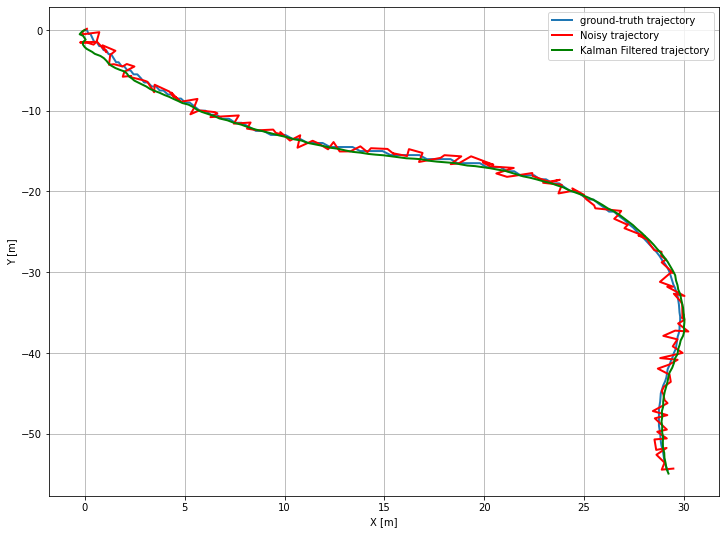

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
xs, ys = gt_trajectory_xyz
ax.plot(xs, ys, lw=2, label='ground-truth trajectory')
xs, ys = obs_trajectory_xyz
ax.plot(xs, ys, lw=2, label='Noisy trajectory', color='r')
ax.plot(mu_x, mu_y, lw=2, label='Kalman Filtered trajectory', color='g')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.legend()
ax.grid()

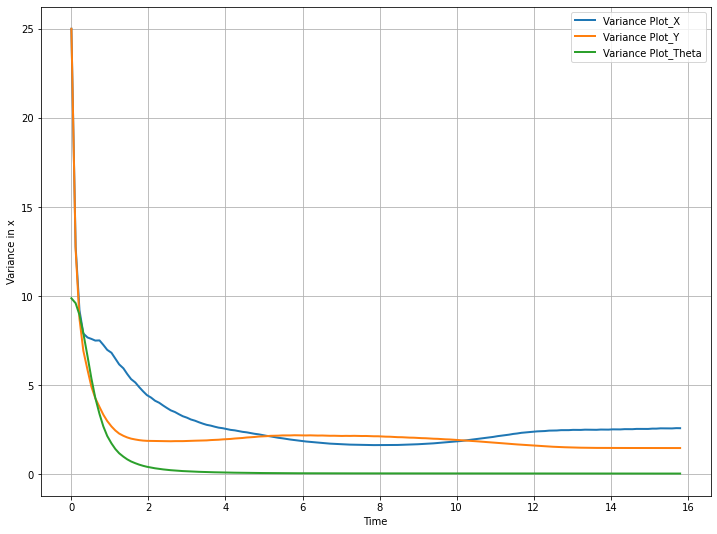

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.plot(ts, var_x, lw=2, label='Variance Plot_X')
ax.plot(ts, var_y, lw=2, label='Variance Plot_Y')
ax.plot(ts, var_theta, lw=2, label='Variance Plot_Theta')

ax.set_xlabel('Time')
ax.set_ylabel('Variance in x')
ax.legend()
ax.grid()